<a href="https://colab.research.google.com/github/anuhyaponugoti/AirlineDelayForecasting/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
delta = pd.read_csv("/content/drive/MyDrive/DS 4002 Project 3 Data/Delta.csv")
southwest = pd.read_csv("/content/drive/MyDrive/DS 4002 Project 3 Data/SouthWest.csv")
spirit = pd.read_csv("/content/drive/MyDrive/DS 4002 Project 3 Data/Spirit.csv")

In [ ]:
delta = delta.dropna()
southwest = southwest.dropna()
spirit = spirit.dropna()

In [ ]:
southwest

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1,WN,01/01/2022,632.0,N222WN,DAL,12:15,12:57,165.0,213.0,42.0,17.0,0.0,48.0,0.0,25.0
2,WN,01/01/2022,690.0,N727SW,PHX,13:45,0:00,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,WN,01/01/2022,1347.0,N728SW,MCO,14:00,0:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WN,01/01/2022,1777.0,N7883A,RSW,12:55,13:23,170.0,203.0,28.0,22.0,0.0,33.0,0.0,6.0
5,WN,01/01/2022,1877.0,N718SW,AUS,14:45,0:00,175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,WN,12/31/2022,2037.0,N268WN,LAS,11:05,11:03,260.0,246.0,-2.0,0.0,0.0,0.0,0.0,0.0
9484,WN,12/31/2022,2076.0,N778SW,DAL,12:15,12:14,145.0,131.0,-1.0,0.0,0.0,0.0,0.0,0.0
9485,WN,12/31/2022,2102.0,N216WR,LAS,17:00,17:17,245.0,258.0,17.0,17.0,0.0,13.0,0.0,0.0
9486,WN,12/31/2022,2420.0,N7873A,BNA,6:45,6:51,90.0,77.0,6.0,0.0,0.0,0.0,0.0,0.0


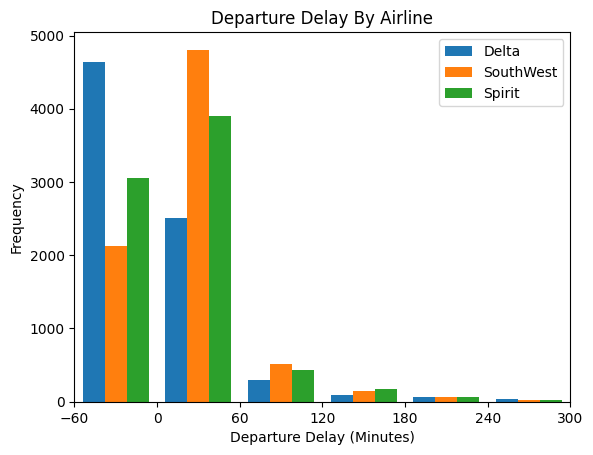

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataframes (you can use your own data)
dataframes = [delta['Departure delay (Minutes)'], southwest['Departure delay (Minutes)'], spirit['Departure delay (Minutes)']]

# Create a DataFrame with the 'Departure delay (Minutes)' column from each dataframe
delay = pd.DataFrame(dataframes).transpose()
delay = delay.dropna()
# Calculate a suitable bin width to fit the entire range of values
min_value = delay.min().min()
max_value = delay.max().max()
bin_width = 50  # Adjust this value to control the bin width

# Create a histogram for 'Departure delay (Minutes)' with a custom bin width
plt.hist(delay, bins=[-60, 0, 60, 120, 180, 240, 300])
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Departure Delay By Airline')
plt.xlim(-1, 300)
plt.xticks(ticks = [-60, 0, 60, 120, 180, 240, 300])
plt.legend(["Delta","SouthWest","Spirit"])
plt.show()




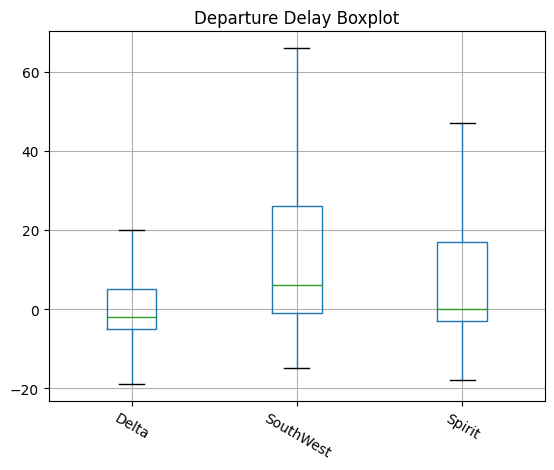

In [ ]:
delay.columns = ["Delta","SouthWest","Spirit"]
ax = delay.boxplot(showfliers=False, rot = -30)
ax.set_title("Departure Delay Boxplot")
plt.show()

In [ ]:
import numpy as np

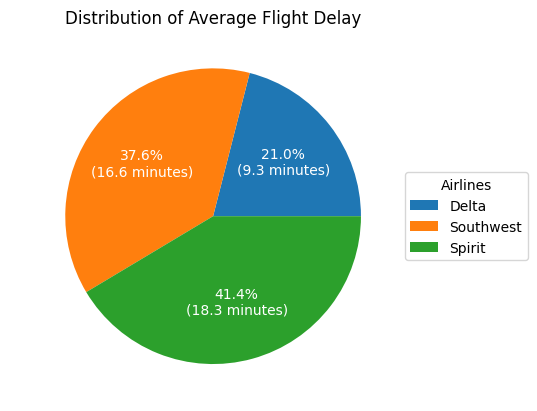

In [ ]:
deltaSum = delay["Delta"].sum()

southwestSum = delay["SouthWest"].sum()

spiritSum = delay["Spirit"].sum()

avgDelta = deltaSum/len(delta)

avgSouthwest = southwestSum/len(southwest)

avgSpirit = spiritSum/len(spirit)

labels = 'Delta', 'Southwest', 'Spirit'
avg = [avgDelta, avgSouthwest, avgSpirit]

def func(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return f"{pct:.1f}%\n({absolute:.1f} minutes)"

fig, ax = plt.subplots()
ax.set_title("Distribution of Average Flight Delay")
wedges, texts, autotexts = ax.pie(avg, labels=labels, autopct = lambda pct: func(pct, avg), textprops=dict(color="w"))
ax.legend(wedges, labels, title="Airlines", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:
#Model
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
df = [delta,southwest,spirit]
df = pd.concat(df)
df = df[["Carrier Code","Date (MM/DD/YYYY)","Destination Airport","Scheduled departure time","Departure delay (Minutes)"]]
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'])
# Extract features from date (e.g., day of week, month)
df['Day'] = df['Date (MM/DD/YYYY)'].dt.day
df['Day of Week'] = df['Date (MM/DD/YYYY)'].dt.dayofweek
df['Month'] = df['Date (MM/DD/YYYY)'].dt.month

# Drop unnecessary columns
df = df.drop(['Date (MM/DD/YYYY)'], axis=1)
df = df.dropna()
df_values = df[["Departure delay (Minutes)"]]

df

,Carrier Code,Destination Airport,Scheduled departure time,Departure delay (Minutes),Day,Day of Week,Month
0,DL,LGA,8:00,13.0,1,5,1
1,DL,LGA,12:10,0.0,1,5,1
2,DL,SEA,14:00,0.0,1,5,1
3,DL,SEA,8:01,3.0,1,5,1
4,DL,ATL,16:00,0.0,1,5,1
...,...,...,...,...,...,...,...
7733,NK,MCO,16:04,3.0,31,5,12
7734,NK,ATL,8:00,20.0,31,5,12
7735,NK,MIA,14:10,4.0,31,5,12
7736,NK,MIA,20:40,-9.0,31,5,12


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_values)
scaled
df[["Departure delay (Minutes)"]] = scaled
df

,Carrier Code,Destination Airport,Scheduled departure time,Departure delay (Minutes),Day,Day of Week,Month
0,DL,LGA,8:00,0.024316,1,5,1
1,DL,LGA,12:10,0.014438,1,5,1
2,DL,SEA,14:00,0.014438,1,5,1
3,DL,SEA,8:01,0.016717,1,5,1
4,DL,ATL,16:00,0.014438,1,5,1
...,...,...,...,...,...,...,...
7733,NK,MCO,16:04,0.016717,31,5,12
7734,NK,ATL,8:00,0.029635,31,5,12
7735,NK,MIA,14:10,0.017477,31,5,12
7736,NK,MIA,20:40,0.007599,31,5,12


In [ ]:
df["Scheduled departure time"] = df["Scheduled departure time"].str.replace(':', '.').astype(float)
dec = df["Scheduled departure time"] % 1
df["Scheduled departure time"] = df["Scheduled departure time"] - dec
dec = dec / 60 * 100
df["Scheduled departure time"] = df["Scheduled departure time"] + dec
df["Scheduled departure time"] = round(df["Scheduled departure time"], 3)
df

,Carrier Code,Destination Airport,Scheduled departure time,Departure delay (Minutes),Day,Day of Week,Month
0,DL,LGA,8.000,0.024316,1,5,1
1,DL,LGA,12.167,0.014438,1,5,1
2,DL,SEA,14.000,0.014438,1,5,1
3,DL,SEA,8.017,0.016717,1,5,1
4,DL,ATL,16.000,0.014438,1,5,1
...,...,...,...,...,...,...,...
7733,NK,MCO,16.067,0.016717,31,5,12
7734,NK,ATL,8.000,0.029635,31,5,12
7735,NK,MIA,14.167,0.017477,31,5,12
7736,NK,MIA,20.667,0.007599,31,5,12


In [ ]:
encoder = LabelEncoder()
df["Carrier Code"] = encoder.fit_transform(df["Carrier Code"])
df["Destination Airport"] = encoder.fit_transform(df["Destination Airport"])

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["Carrier Code", "Day of Week", "Month", "Destination Airport","Scheduled departure time"]]
y = scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19206, 1, 5) (8232, 1, 5) (19206, 1) (8232, 1)


Epoch 1/50
267/267 - 3s - loss: 0.0363 - val_loss: 0.0169 - 3s/epoch - 13ms/step
Epoch 2/50
267/267 - 1s - loss: 0.0169 - val_loss: 0.0177 - 1s/epoch - 4ms/step
Epoch 3/50
267/267 - 1s - loss: 0.0161 - val_loss: 0.0174 - 814ms/epoch - 3ms/step
Epoch 4/50
267/267 - 1s - loss: 0.0160 - val_loss: 0.0156 - 905ms/epoch - 3ms/step
Epoch 5/50
267/267 - 1s - loss: 0.0158 - val_loss: 0.0162 - 931ms/epoch - 3ms/step
Epoch 6/50
267/267 - 1s - loss: 0.0157 - val_loss: 0.0159 - 1s/epoch - 4ms/step
Epoch 7/50
267/267 - 1s - loss: 0.0156 - val_loss: 0.0174 - 1s/epoch - 4ms/step
Epoch 8/50
267/267 - 1s - loss: 0.0156 - val_loss: 0.0167 - 1s/epoch - 4ms/step
Epoch 9/50
267/267 - 1s - loss: 0.0155 - val_loss: 0.0152 - 1s/epoch - 4ms/step
Epoch 10/50
267/267 - 1s - loss: 0.0156 - val_loss: 0.0162 - 1s/epoch - 4ms/step
Epoch 11/50
267/267 - 1s - loss: 0.0154 - val_loss: 0.0152 - 919ms/epoch - 3ms/step
Epoch 12/50
267/267 - 1s - loss: 0.0153 - val_loss: 0.0157 - 813ms/epoch - 3ms/step
Epoch 13/50
267/267 -

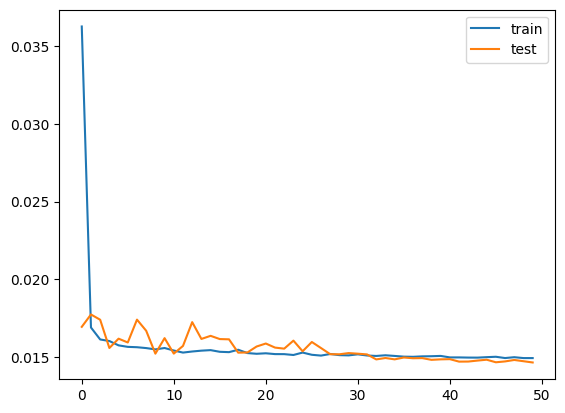

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
yhat = model.predict(X_test)
test_X = X_test.reshape((X_test.shape[0], X_test.shape[2]))



258/258 [==============================] - 0s 1ms/step


In [ ]:
yhat

array([[0.02038671],
       [0.01213362],
       [0.01610256],
       ...,
       [0.01705786],
       [0.01801519],
       [0.01932424]], dtype=float32)

In [ ]:
inv_yhat = concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [ ]:
inv_yhat

array([ 7.82890646, -3.03216009,  2.19097368, ...,  3.44814657,
        4.7079962 ,  6.43069898])

In [ ]:
test_y = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

array([40., 22., -1., ..., -1., 10.,  3.])

In [ ]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 51.498


In [ ]:
df["Carrier Code"].value_counts()

0    10304
2     9396
1     7738
Name: Carrier Code, dtype: int64

In [ ]:
# carrier code
test_X_list = test_X[:, 0].tolist()

In [ ]:
inv_yhat_list = inv_yhat.flatten().tolist()

In [ ]:
predicted_delays = pd.DataFrame(data={"Carrier Code": test_X_list, "Predicted Delay": inv_yhat_list})
predicted_delays

,Carrier Code,Predicted Delay
0,1.0,7.828906
1,2.0,-3.032160
2,1.0,2.190974
3,1.0,9.300891
4,2.0,7.535429
...,...,...
8227,1.0,2.830140
8228,2.0,16.252439
8229,0.0,3.448147
8230,1.0,4.707996


In [ ]:
predicted_delays["Predicted Delay"].groupby(predicted_delays["Carrier Code"]).mean()

Carrier Code
0.0   -1.351038
1.0    3.403246
2.0    9.323780
Name: Predicted Delay, dtype: float64

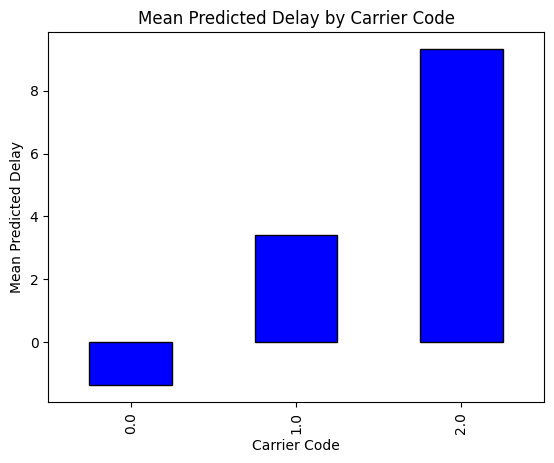

In [ ]:
delay_by_carrier = predicted_delays.groupby('Carrier Code')['Predicted Delay'].mean()

# Create a bar plot
delay_by_carrier.plot(kind='bar', color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Carrier Code')
plt.ylabel('Mean Predicted Delay')
plt.title('Mean Predicted Delay by Carrier Code')

# Show the plot
plt.show()